# Lec No 35: Categorical Variable Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
import statsmodels.api as s

In [4]:
tbl=pd.read_excel('dummy.xlsx')
tbl

,servicecall,months_since_last_service,type_of_repair,repair_time_in_hours
0,1,2,electrical,2.9
1,2,6,mechanical,3.0
2,3,8,electrical,4.8
3,4,3,mechanical,1.8
4,5,2,electrical,2.9
5,6,7,electrical,4.9
6,7,9,mechanical,4.2
7,8,8,mechanical,4.8
8,9,4,electrical,4.4
9,10,6,electrical,4.5


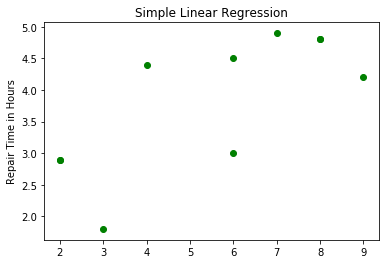

In [5]:
plt.scatter(tbl['months_since_last_service'],tbl['repair_time_in_hours'],color='green')
plt.ylabel('Repair Time in Hours')
plt.title('Simple Linear Regression')
plt.show()

In [7]:
from statsmodels.formula.api import ols
reg=ols(formula='repair_time_in_hours~months_since_last_service',data=tbl)
Fit1=reg.fit()
print(Fit1.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.534
Model:                              OLS   Adj. R-squared:                  0.476
Method:                   Least Squares   F-statistic:                     9.174
Date:                  Mon, 06 Jan 2020   Prob (F-statistic):             0.0163
Time:                          13:12:46   Log-Likelihood:                -10.602
No. Observations:                    10   AIC:                             25.20
Df Residuals:                         8   BIC:                             25.81
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

C:\Users\A609272\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


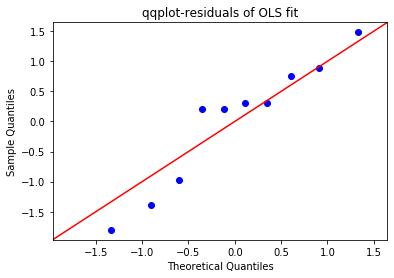

0    0.144463
1   -0.972066
2    0.219669
3   -1.259669
4    0.144463
5    0.623802
6   -0.684463
7    0.219669
8    1.036198
9    0.527934
dtype: float64

In [11]:
res=Fit1.resid
probplot=s.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot-residuals of OLS fit')
plt.show()
res

In [12]:
just_dummies=pd.get_dummies(tbl['type_of_repair'])
just_dummies

,electrical,mechanical
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
5,1,0
6,0,1
7,0,1
8,1,0
9,1,0


In [14]:
step_1=pd.concat([tbl,just_dummies],axis=1)
step_1
step_1.drop(['type_of_repair','mechanical'],inplace=True,axis=1)
step_1

,servicecall,months_since_last_service,repair_time_in_hours,electrical
0,1,2,2.9,1
1,2,6,3.0,0
2,3,8,4.8,1
3,4,3,1.8,0
4,5,2,2.9,1
5,6,7,4.9,1
6,7,9,4.2,0
7,8,8,4.8,0
8,9,4,4.4,1
9,10,6,4.5,1


In [25]:
result=s.OLS(step_1['repair_time_in_hours'],s.add_constant(step_1[['months_since_last_service','electrical']])).fit()
print(result.summary())

                             OLS Regression Results                             
Dep. Variable:     repair_time_in_hours   R-squared:                       0.859
Model:                              OLS   Adj. R-squared:                  0.819
Method:                   Least Squares   F-statistic:                     21.36
Date:                  Mon, 06 Jan 2020   Prob (F-statistic):            0.00105
Time:                          14:18:14   Log-Likelihood:                -4.6200
No. Observations:                    10   AIC:                             15.24
Df Residuals:                         7   BIC:                             16.15
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
co

In [26]:
tbl2=pd.read_excel('dummy2.xlsx')
tbl2

,Employee,Salary,Gender,Experience
0,1,7.5,Male,6
1,2,8.6,Male,10
2,3,9.1,Male,12
3,4,10.3,Male,18
4,5,13.0,Male,30
5,6,6.2,Female,5
6,7,8.7,Female,13
7,8,9.4,Female,15
8,9,9.8,Female,21


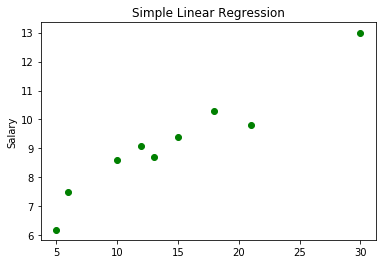

In [27]:
plt.scatter(tbl2['Experience'],tbl2['Salary'],color='green')
plt.ylabel('Salary')
plt.title('Simple Linear Regression')
plt.show()

In [34]:
result2=s.OLS(tbl2['Salary'],s.add_constant(tbl2['Experience'])).fit()# Use this syntax for OLS always
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     87.61
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           3.30e-05
Time:                        14:44:15   Log-Likelihood:                -6.2491
No. Observations:                   9   AIC:                             16.50
Df Residuals:                       7   BIC:                             16.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8093      0.404     14.386      0.0

In [36]:
just_dummies2=pd.get_dummies(tbl2['Gender'])
just_dummies2

,Female,Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,1,0
7,1,0
8,1,0


In [42]:
step_1=pd.concat([tbl2,just_dummies2],axis=1)
step_1.drop(['Gender','Male'],inplace=True,axis=1)
result=s.OLS(step_1['Salary'],s.add_constant(step_1[['Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.8426
Date:                Mon, 06 Jan 2020   Prob (F-statistic):              0.389
Time:                        14:58:15   Log-Likelihood:                -17.455
No. Observations:                   9   AIC:                             38.91
Df Residuals:                       7   BIC:                             39.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7000      0.853     11.367      0.0

In [40]:
result=s.OLS(step_1['Salary'],s.add_constant(step_1[['Experience','Female']])).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     111.6
Date:                Mon, 06 Jan 2020   Prob (F-statistic):           1.80e-05
Time:                        14:56:13   Log-Likelihood:                -1.5752
No. Observations:                   9   AIC:                             9.150
Df Residuals:                       6   BIC:                             9.742
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2485      0.291     21.439      0.0